In [1]:
import re
import math

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import urllib.request as urllib2

from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from zipfile import ZipFile
from io import BytesIO

In [2]:
#Getting zipped file and load csv cities temperature file 
zipCityTemp = urllib2.urlopen("https://raw.githubusercontent.com/renatopaulobs/notes-node/master/city_temperature.zip").read()
file = ZipFile(BytesIO(zipCityTemp))
citiesTemp = pd.read_csv(file.open("city_temperature.csv"))

/Users/paulo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
citiesTemp.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Burundi,NaN,Bujumbura,2,25,2000,-99.0
1,Africa,Burundi,NaN,Bujumbura,2,26,2000,-99.0
2,Africa,Burundi,NaN,Bujumbura,2,27,2000,-99.0
3,Africa,Burundi,NaN,Bujumbura,2,28,2000,-99.0
4,Africa,Burundi,NaN,Bujumbura,2,29,2000,-99.0


In [4]:
citiesTemp.dtypes

Region             object
Country            object
State              object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object

In [5]:
#Setting category types in columns there are not numbers(float, int)
citiesTemp['Region'] = citiesTemp['Region'].astype('category')
citiesTemp['Country'] = citiesTemp['Country'].astype('category')
citiesTemp['State'] = citiesTemp['State'].astype('category')
citiesTemp['City'] = citiesTemp['City'].astype('category')
citiesTemp.dtypes

Region            category
Country           category
State             category
City              category
Month                int64
Day                  int64
Year                 int64
AvgTemperature     float64
dtype: object

In [6]:
citiesTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893540 entries, 0 to 2893539
Data columns (total 8 columns):
 #   Column          Dtype   
---  ------          -----   
 0   Region          category
 1   Country         category
 2   State           category
 3   City            category
 4   Month           int64   
 5   Day             int64   
 6   Year            int64   
 7   AvgTemperature  float64 
dtypes: category(4), float64(1), int64(3)
memory usage: 102.1 MB


In [7]:
citiesTemp.shape

(2893540, 8)

In [8]:
#removing rows duplicated
citiesTemp = citiesTemp.drop_duplicates()
citiesTemp.shape

(2872825, 8)

In [9]:
citiesTemp.count()

Region            2872825
Country           2872825
State             1435167
City              2872825
Month             2872825
Day               2872825
Year              2872825
AvgTemperature    2872825
dtype: int64

In [10]:
#Verify if there is a line only with NaN values
for col in citiesTemp.columns: # check missing values (Nan) in every column
    print(col + ": "+ str((citiesTemp[col].isna().any())))

Region: False
Country: False
State: True
City: False
Month: False
Day: False
Year: False
AvgTemperature: False


In [11]:
#It is possible to see that there is no line only with NaN values
#Verify if there is a line only with 0 values
for col in citiesTemp.columns: # check missing values (Nan) in every column
    print(col + ": "+ str((citiesTemp[col] == 0).any()))

Region: False
Country: False
State: False
City: False
Month: False
Day: True
Year: False
AvgTemperature: True


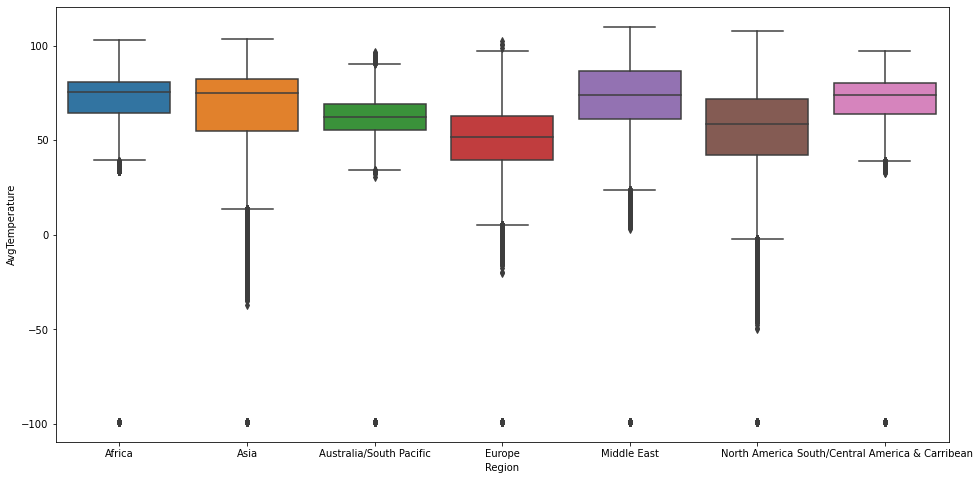

In [12]:
#Verifying outliers
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x='Region',y='AvgTemperature',data=citiesTemp,ax=ax)

In [13]:
#Check number of -99 avgTemperature. In this dataset -99 represents a missing temperature
citiesTemp[citiesTemp['AvgTemperature']==-99.0].count()

Region            77857
Country           77857
State              4698
City              77857
Month             77857
Day               77857
Year              77857
AvgTemperature    77857
dtype: int64

In [14]:
#Remove all -99 avgTemperature occurrency
citiesTemp=citiesTemp.drop(citiesTemp[citiesTemp['AvgTemperature']==-99.0].index)
citiesTemp.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
1239,Africa,Burundi,NaN,Bujumbura,7,18,2003,81.3
1431,Africa,Burundi,NaN,Bujumbura,1,26,2004,56.1
1444,Africa,Burundi,NaN,Bujumbura,2,8,2004,80.2
1445,Africa,Burundi,NaN,Bujumbura,2,9,2004,61.7
1446,Africa,Burundi,NaN,Bujumbura,2,10,2004,69.0


In [15]:
citiesTemp.isna().sum()

Region                  0
Country                 0
State             1364499
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [18]:
#Removing State Column due to a great number of NaN occurrencies 50%
citiesTemp = citiesTemp.drop('State',axis=1)
citiesTemp.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
1239,Africa,Burundi,Bujumbura,7,18,2003,81.3
1431,Africa,Burundi,Bujumbura,1,26,2004,56.1
1444,Africa,Burundi,Bujumbura,2,8,2004,80.2
1445,Africa,Burundi,Bujumbura,2,9,2004,61.7
1446,Africa,Burundi,Bujumbura,2,10,2004,69.0


In [19]:
#Convert AvgTemperature to Celsius
citiesTemp['AvgTemperature'] = (citiesTemp['AvgTemperature'] -32)*(5/9)
citiesTemp.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
1239,Africa,Burundi,Bujumbura,7,18,2003,27.388889
1431,Africa,Burundi,Bujumbura,1,26,2004,13.388889
1444,Africa,Burundi,Bujumbura,2,8,2004,26.777778
1445,Africa,Burundi,Bujumbura,2,9,2004,16.500000
1446,Africa,Burundi,Bujumbura,2,10,2004,20.555556


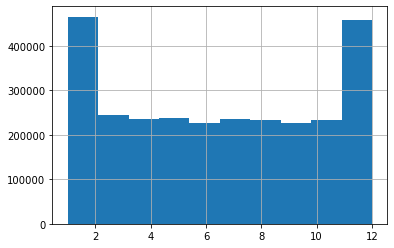

In [24]:
citiesTemp.Month.hist()

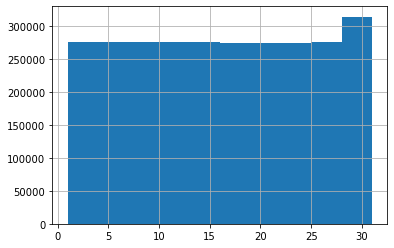

In [23]:
citiesTemp.Day.hist()

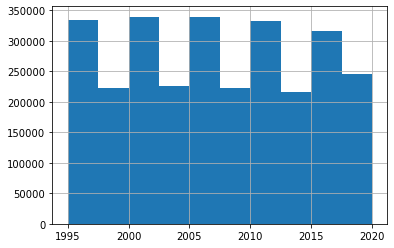

In [22]:
citiesTemp.Year.hist()

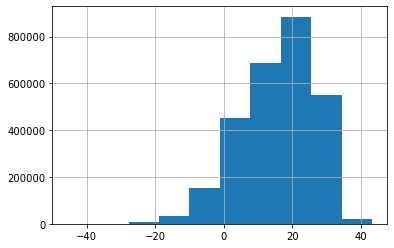

In [25]:
citiesTemp.AvgTemperature.hist()

In [42]:
#Check if the order of hottest regions makes sense. It is expected that Africa region is the hottest.
regionAvg= citiesTemp.groupby(['Region'])['AvgTemperature'].mean().reset_index().sort_values(by='AvgTemperature',ascending=False)
regionAvg.style.background_gradient(cmap='Blues')

,Region,AvgTemperature
0,Africa,23.793424
4,Middle East,23.244824
6,South/Central America & Carribean,22.334458
1,Asia,20.060957
2,Australia/South Pacific,16.835385
5,North America,13.386747
3,Europe,11.087854


In [41]:
#Variation of max avgTemperature according years
region= citiesTemp.groupby(['Region','Year'])['AvgTemperature'].max().reset_index().sort_values(by='AvgTemperature',ascending=False)
region.head(30).style.background_gradient(cmap='Blues')

,Region,Year,AvgTemperature
121,Middle East,2012,43.333333
126,Middle East,2017,43.277778
124,Middle East,2015,43.277778
114,Middle East,2005,43.277778
119,Middle East,2010,43.166667
117,Middle East,2008,43.055556
128,Middle East,2019,43.000000
122,Middle East,2013,43.000000
107,Middle East,1998,42.888889
109,Middle East,2000,42.888889


In [43]:
#Max avgTemperatures by country
country= citiesTemp.groupby(['Country','City'])['AvgTemperature'].mean().reset_index().sort_values(by='AvgTemperature',ascending=False).head(30)
country.style.background_gradient(cmap='Blues')

,Country,City,AvgTemperature
24847,Nigeria,Niamey,29.979941
13988,Haiti,Port au Prince,29.638010
34263,Thailand,Bangkok,28.843793
37219,United Arab Emirates,Dubai,28.679459
15432,India,Chennai (Madras),28.565522
15828,Indonesia,Jakarta,28.536794
13559,Guyana,Georgetown,28.525489
25800,Oman,Muscat,28.314483
27938,Qatar,Doha,28.312343
37122,United Arab Emirates,Abu Dhabi,28.255446


In [37]:
#Top Hottest AvgTemperature by year in Brazil
bra=citiesTemp[citiesTemp['Country']=='Brazil']
bra_val= bra.groupby(['Year'])['AvgTemperature'].mean().reset_index().sort_values(by='AvgTemperature',ascending=False)
bra_val.style.background_gradient(cmap='Blues')

,Year,AvgTemperature
25,2020,23.087697
24,2019,23.086425
19,2014,22.946230
7,2002,22.795969
6,2001,22.684575
20,2015,22.615792
3,1998,22.612999
15,2010,22.444140
21,2016,22.366841
17,2012,22.319267
